# Life Expectancy (WHO)
* Statistical Analysis on factors influencing Life Expectancy



## Context

Although there have been lot of studies undertaken in the past on factors affecting life expectancy considering demographic variables, income composition and mortality rates. It was found that affect of immunization and human development index was not taken into account in the past. Also, some of the past research was done considering multiple linear regression based on data set of one year for all the countries. Hence, this gives motivation to resolve both the factors stated previously by formulating a regression model based on mixed effects model and multiple linear regression while considering data from a period of 2000 to 2015 for all the countries. Important immunization like Hepatitis B, Polio and Diphtheria will also be considered. In a nutshell, this study will focus on immunization factors, mortality factors, economic factors, social factors and other health related factors as well. Since the observations this dataset are based on different countries, it will be easier for a country to determine the predicting factor which is contributing to lower value of life expectancy. This will help in suggesting a country which area should be given importance in order to efficiently improve the life expectancy of its population.


## Content

The project relies on accuracy of data. The Global Health Observatory (GHO) data repository under World Health Organization (WHO) keeps track of the health status as well as many other related factors for all countries The data-sets are made available to public for the purpose of health data analysis. The data-set related to life expectancy, health factors for 193 countries has been collected from the same WHO data repository website and its corresponding economic data was collected from United Nation website. Among all categories of health-related factors only those critical factors were chosen which are more representative. It has been observed that in the past 15 years , there has been a huge development in health sector resulting in improvement of human mortality rates especially in the developing nations in comparison to the past 30 years. Therefore, in this project we have considered data from year 2000-2015 for 193 countries for further analysis. The individual data files have been merged together into a single data-set. On initial visual inspection of the data showed some missing values. As the data-sets were from WHO, we found no evident errors. Missing data was handled in R software by using Missmap command. The result indicated that most of the missing data was for population, Hepatitis B and GDP. The missing data were from less known countries like Vanuatu, Tonga, Togo, Cabo Verde etc. Finding all data for these countries was difficult and hence, it was decided that we exclude these countries from the final model data-set. The final merged file(final dataset) consists of 22 Columns and 2938 rows which meant 20 predicting variables. All predicting variables was then divided into several broad categories:​Immunization related factors, Mortality factors, Economical factors and Social factors.


## Acknowledgements

The data was collected from WHO and United Nations website with the help of Deeksha Russell and Duan Wang.


## Inspiration

The data-set aims to answer the following key questions:

   - Does various predicting factors which has been chosen initially really affect the Life expectancy? What are the predicting variables actually affecting the life expectancy?
   - Should a country having a lower life expectancy value(<65) increase its healthcare expenditure in order to improve its average lifespan?
   - How does Infant and Adult mortality rates affect life expectancy?
   - Does Life Expectancy has positive or negative correlation with eating habits, lifestyle, exercise, smoking, drinking alcohol etc.
   - What is the impact of schooling on the lifespan of humans?
   - Does Life Expectancy have positive or negative relationship with drinking alcohol?
   - Do densely populated countries tend to have lower life expectancy?
   - What is the impact of Immunization coverage on life Expectancy?


### Note: This study created simple visualizations dont forget it but for basic levels!

In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns
from sklearn.preprocessing import scale 
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import roc_auc_score,roc_curve
import statsmodels.formula.api as smf
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score                # we are using this for model tunning

from warnings import filterwarnings
filterwarnings('ignore')

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

In [3]:
Life_Expectancy_Data = pd.read_csv("Life Expectancy Data.csv")
data = Life_Expectancy_Data.copy()
data = data.dropna()            # If there is a missing or empty observation, delete it. Or 'data.fillna(data.mean(), inplace=True)' with this make NaN values take mean

lindata = data.copy()
multidata = data.copy()
polydata = data.copy()
RFdata = data.copy()
logdata = data.copy()

# 
Linear Regression

In [270]:
lindata.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1649 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          1649 non-null   object 
 1   Year                             1649 non-null   int64  
 2   Status                           1649 non-null   object 
 3   Life expectancy                  1649 non-null   float64
 4   Adult Mortality                  1649 non-null   float64
 5   infant deaths                    1649 non-null   int64  
 6   Alcohol                          1649 non-null   float64
 7   percentage expenditure           1649 non-null   float64
 8   Hepatitis B                      1649 non-null   float64
 9   Measles                          1649 non-null   int64  
 10   BMI                             1649 non-null   float64
 11  under-five deaths                1649 non-null   int64  
 12  Polio                    

In [5]:
lindata.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [32]:
lindata.corr()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
Year,1.000000,0.050771,-0.037092,0.008029,-0.113365,0.069553,0.114897,-0.053822,0.005739,0.010479,-0.016699,0.059493,0.029641,-0.123405,0.096421,0.012567,0.019757,0.014122,0.122892,0.088732
Life expectancy,0.050771,1.000000,-0.702523,-0.169074,0.402718,0.409631,0.199935,-0.068881,0.542042,-0.192265,0.327294,0.174718,0.341331,-0.592236,0.441322,-0.022305,-0.457838,-0.457508,0.721083,0.727630
Adult Mortality,-0.037092,-0.702523,1.000000,0.042450,-0.175535,-0.237610,-0.105225,-0.003967,-0.351542,0.060365,-0.199853,-0.085227,-0.191429,0.550691,-0.255035,-0.015012,0.272230,0.286723,-0.442203,-0.421171
infant deaths,0.008029,-0.169074,0.042450,1.000000,-0.106217,-0.090765,-0.231769,0.532680,-0.234425,0.996906,-0.156929,-0.146951,-0.161871,0.007712,-0.098092,0.671758,0.463415,0.461908,-0.134754,-0.214372
Alcohol,-0.113365,0.402718,-0.175535,-0.106217,1.000000,0.417047,0.109889,-0.050110,0.353396,-0.101082,0.240315,0.214885,0.242951,-0.027113,0.443433,-0.028880,-0.403755,-0.386208,0.561074,0.616975
percentage expenditure,0.069553,0.409631,-0.237610,-0.090765,0.417047,1.000000,0.016760,-0.063071,0.242738,-0.092158,0.128626,0.183872,0.134813,-0.095085,0.959299,-0.016792,-0.255035,-0.255635,0.402170,0.422088
Hepatitis B,0.114897,0.199935,-0.105225,-0.231769,0.109889,0.016760,1.000000,-0.124800,0.143302,-0.240766,0.463331,0.113327,0.588990,-0.094802,0.041850,-0.129723,-0.129406,-0.133251,0.184921,0.215182
Measles,-0.053822,-0.068881,-0.003967,0.532680,-0.050110,-0.063071,-0.124800,1.000000,-0.153245,0.517506,-0.057850,-0.113583,-0.058606,-0.003522,-0.064768,0.321946,0.180642,0.174946,-0.058277,-0.115660
BMI,0.005739,0.542042,-0.351542,-0.234425,0.353396,0.242738,0.143302,-0.153245,1.000000,-0.242137,0.186268,0.189469,0.176295,-0.210897,0.266114,-0.081416,-0.547018,-0.554094,0.510505,0.554844
under-five deaths,0.010479,-0.192265,0.060365,0.996906,-0.101082,-0.092158,-0.240766,0.517506,-0.242137,1.000000,-0.171164,-0.145803,-0.178448,0.019476,-0.100331,0.658680,0.464785,0.462289,-0.148097,-0.226013


Looking at heatmap, there is a good relationship (correlation exists) between the best 'GDP' and 'percentage expenditure' in the Life Expectation data.


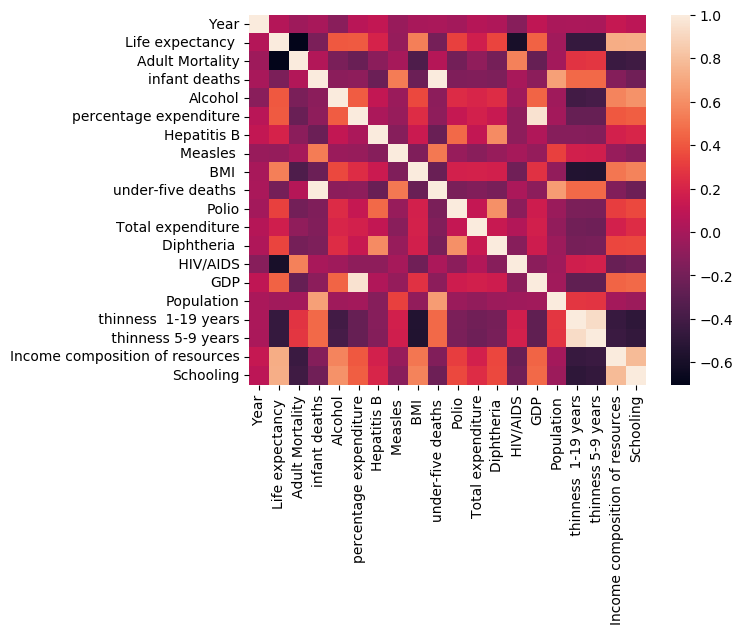

In [7]:
# plot the heatmap
corr = lindata.corr()
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)



Here it is better to establish a linear model between 'GDP' and 'percentage expenditure'. Let's see what our spending percentages are compared to the "GDP" increase. Let's create and fit our linear model.

In [8]:
linear_reg = LinearRegression()
x = lindata.GDP.values.reshape(-1,1)
y = lindata['percentage expenditure'].values.reshape(-1,1)          

linear_reg.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

## y = b0 + b1*x is our linear regression model.
Let's see estimated percentage of expenditure in GDP 10 thousand:

In [9]:
b0 = linear_reg.predict(([[10000]]))       
print("b0: ", b0)

b1 = linear_reg.coef_
print("b1: ", b1)

b0:  [[1351.02549826]]
b1:  [[0.14705833]]


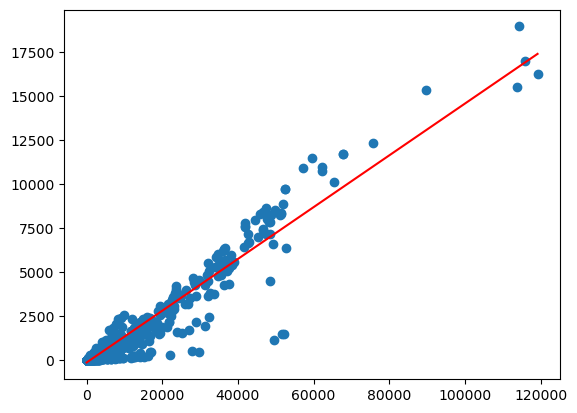

Mean Absolute Error:  50943.94783778521
Mean Squared Error:  3456291221.6604414
Root Mean Squared Error:  58790.230665140625


In [10]:
x_array = np.arange(min(lindata.GDP),max(lindata.GDP)).reshape(-1,1)  # this for information about the line to be predicted

plt.scatter(x=x,y=y)
y_head = linear_reg.predict(x_array)                                 # this is predict percentage of expenditure
plt.plot(x_array,y_head,color="red")
plt.show()

from sklearn import metrics
print("Mean Absolute Error: ", metrics.mean_absolute_error(x_array,y_head))
print("Mean Squared Error: ", metrics.mean_squared_error(x_array,y_head))
print("Root Mean Squared Error: ", np.sqrt(metrics.mean_squared_error(x_array, y_head)))



In [11]:
print(r2_score(y, linear_reg.predict(x)))

0.920254296978608


#### The conclusion here is: the estimate made has 92% accuracy.

# Multi Linear Regression

* Here, let's take a look at the variable that depends on Life Expectancy.
* If there is missing observation or empty, delete it. Or 'data.fillna (data.mean (), inplace = True)' with this make NaN values averaged.
* When we look at the data, Country and Status columns are composed of objects. Because we need to be int or float.
* and let's take the last two columns (Income composition of resources, schooling) as independent variables.

In [12]:
Life_Expectancy_Data = pd.read_csv("Life Expectancy Data.csv")
data = Life_Expectancy_Data.copy()
data = data.dropna()

multidata = data.copy()

multidata.drop(["Country", "Status"], axis=1, inplace=True)             # When we look at the data, Country and Status columns are composed of objects. Because we need to be int or float.

x = multidata.iloc[:, [-2,-1]].values                                   # I took the last two columns (Income composition of resources, schooling) as independent variables.
y = multidata["percentage expenditure"].values.reshape(-1,1)            # our independent variable


In [13]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state= 42)
lm = LinearRegression()
model = lm.fit(x_train,y_train)

In [14]:
print("b0: ", lm.intercept_)
print("b1,b2: ", lm.coef_)

b0:  [-2735.63211318]
b1,b2:  [[1755.9938428   195.23412791]]


We look at what the data set we created here will affect how much it will affect our survival.

In [15]:
new_data = [[0.4,8], [0.5,10]]   
new_data = pd.DataFrame(new_data).T       # .T is transfor the chart.
model.predict(new_data) 

array([[-1935.6175121 ],
       [13264.65990838]])

### Now let's look at the correctness of the evaluation we made. If the difference between the train error and the test error is not much, modeling is good.

In [16]:
rmse = np.sqrt(mean_squared_error(y_train, model.predict(x_train)))
rmse

1656.8188428933995

In [17]:
model.score(x_train, y_train) 

0.20013529701170396

### CV $r^2$ value of the model:

In [18]:
cross_val_score(model, x_train,  y_train, cv= 10, scoring="r2").mean()

0.20636638134807278

Predicts of Train set values:

In [19]:
y_head = model.predict(x_test)
y_head[0:5]

array([[ 532.26736558],
       [1204.73203886],
       [2006.21418475],
       [  29.9417957 ],
       [-880.31581876]])

In [20]:
y_test_1 =np.array(range(0,len(y_test)))

Test r2 error =  0.09821875898006771


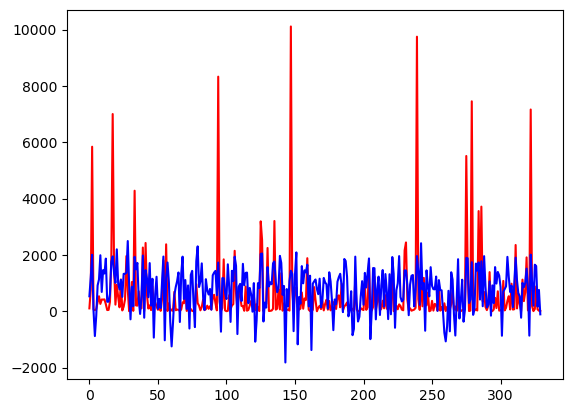

In [21]:
# r2 value: 
r2_degeri = r2_score(y_test, y_head)
print("Test r2 error = ",r2_degeri) 

plt.plot(y_test_1,y_test,color="r")
plt.plot(y_test_1,y_head,color="blue")
plt.show()

# Polynomial Regression

We will use the same data set.

In [22]:
from sklearn.preprocessing import PolynomialFeatures     # this gives properties of polynomial

Life_Expectancy_Data = pd.read_csv("Life Expectancy Data.csv")
data = Life_Expectancy_Data.copy()
data = data.dropna()        

polydata = data.copy()

Let's see what our spending percentages are compared to the "GDP" increase. Let's create and fit our linear model.

In [23]:
linear_reg = LinearRegression()
x = polydata.GDP.values.reshape(-1,1)
y = polydata['percentage expenditure'].values.reshape(-1,1)          

linear_reg.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [24]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state= 42)

Let's look at the 15th degree. If it's not, we should change it.

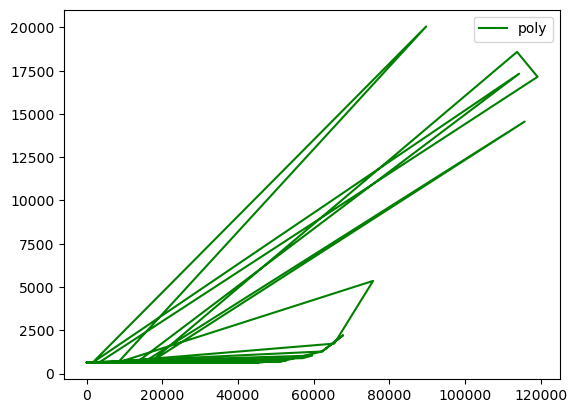

In [25]:
polynomial_regression = PolynomialFeatures(degree = 15)    
x_polynomial = polynomial_regression.fit_transform(x)

linear_reg2 = LinearRegression()
linear_reg2.fit(x_polynomial,y)

y_head = linear_reg2.predict(x_polynomial)

plt.plot(x,y_head,color="green",label="poly")
plt.legend()
plt.show()

With degree we determine the precision of our forecast. If it is too large, it will deteriorate, so it is necessary to determine according to the data.

In [26]:
pol_reg = PolynomialFeatures(degree = 8)                    

level_poly = pol_reg.fit_transform(x_train)                 # According to the polynomial, x_train is defined

lm = LinearRegression()                                     
lm.fit(level_poly,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [27]:
y_head = lm.predict(pol_reg.fit_transform(x_train))
y_test =np.array(range(0,len(y_train)))

Consistency and scatter drawing of $r^2$ model:

r2 value:  0.6496357950943763


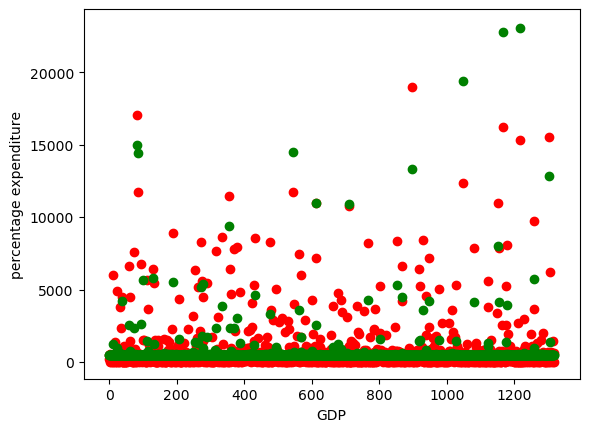

In [28]:
r2 = r2_score(y_train, y_head)
print("r2 value: ", r2)                               # percentage of significance


plt.scatter(y_test, y_train, color="red")
plt.scatter(y_test, y_head, color = "g")
plt.xlabel("GDP")
plt.ylabel("percentage expenditure")
plt.show()

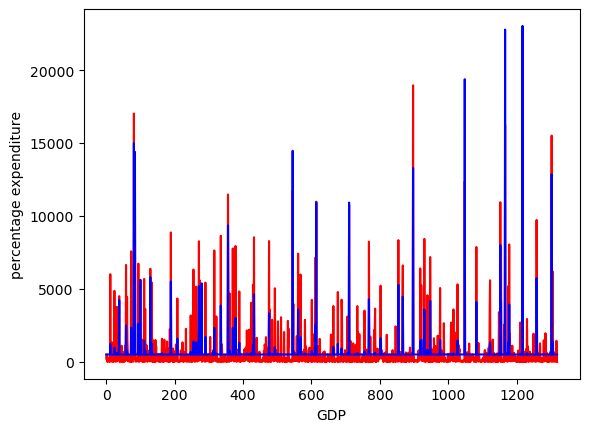

In [29]:
plt.plot(y_test,y_train, color="red")
plt.plot(y_test, y_head, color = "blue")
plt.xlabel("GDP")
plt.ylabel("percentage expenditure")
plt.show()

# Decision Tree Regression

In [30]:
from sklearn.tree import DecisionTreeRegressor               # for our predict model

Life_Expectancy_Data = pd.read_csv("Life Expectancy Data.csv")
data = Life_Expectancy_Data.copy()
data = data.dropna()                                         # same is done 

DTdata = data.copy()

In [31]:
x = polydata.GDP.values.reshape(-1,1)
y = polydata['percentage expenditure'].values.reshape(-1,1)

In [298]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state= 42)

Let's see Expenditure percentage estimation of the country with "GDP" value of 1000:

In [299]:
DT_reg = DecisionTreeRegressor()           # created model
DT_reg.fit(x_train,y_train)                # fitted model according to train values

print(DT_reg.predict([[1000]]))            

[98.68367951]


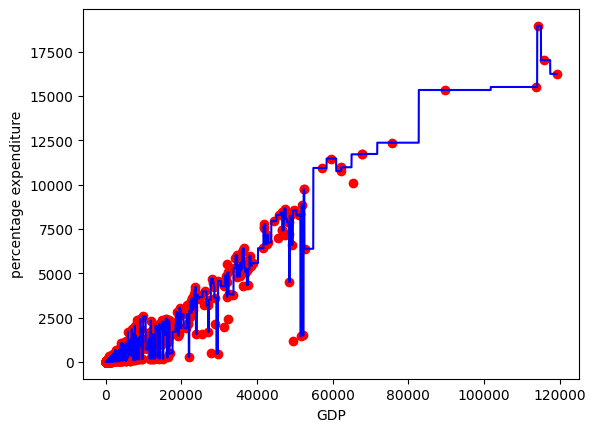

In [300]:
x_array = np.arange(min(x),max(x),0.01).reshape(-1,1)   # line information to be drawn as a predict
y_head = DT_reg.predict(x_array)                        # percentage of spend estimate

plt.scatter(x,y, color="red")
plt.plot(x_array,y_head,color="blue")
plt.xlabel("GDP")
plt.ylabel("percentage expenditure")
plt.show()

### Result: See how it is nice picture and very successful accuracy score.

# Random Forest Regression
* A logic of DecisionTree. For example, 3000 sample data is selected from 100 thousand data and the result is obtained.

In [301]:
from sklearn.ensemble import RandomForestRegressor           # for our predict model

Life_Expectancy_Data = pd.read_csv("Life Expectancy Data.csv")
data = Life_Expectancy_Data.copy()
data = data.dropna()                                         # same is done 

RFdata = data.copy()

In [302]:
x = polydata.GDP.values.reshape(-1,1)
y = polydata['percentage expenditure'].values.reshape(-1,1)

Create regression with 5 DecisionTreeReg in the sklearn RandomForestRegressor model. We can do as many as we want. Giving random_state does not change the outcome. When we say 1, it should not change once.

In [303]:
RF_reg = RandomForestRegressor(n_estimators=100, random_state=42)          
RF_reg.fit(x,y)                                                # the best fit line is drawn

RandomForestRegressor(random_state=42)

Expenditure percentage estimation of the country with "GDP" value of 1000:

In [304]:
print(RF_reg.predict([[1000]]))            

[73.33903837]


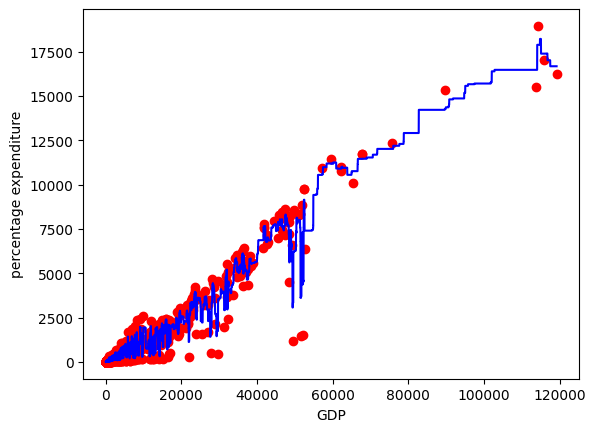

In [305]:
x_array = np.arange(min(x),max(x),0.01).reshape(-1,1)   # line information to be drawn as a predict
y_head = RF_reg.predict(x_array)                        # percentage of spend predict

plt.scatter(x,y, color="red")
plt.plot(x_array,y_head,color="blue")
plt.xlabel("GDP")
plt.ylabel("percentage expenditure")
plt.show()

### Result: This result good but not so good as BEFORE.

# Logistic Regression Model

* The aim is to reveal the class that will occur when a set of x values that have not yet been observed, to predict a classifier.
* For the classification problem, to establish a linear model that defines the relationship between dependent and independent variables.
* Regarding whether the dependent variable is 1 or 0 or yes or no status


** In this data, we will examine the states of Developed countries (Developed) = 0 and Developing = 1. I want to find the level of development I want, so close to 1!

When we look at the country column data, it consists of objects, let's drop it. Because we need int or float values.

In [306]:
logdata.drop(["Country"], axis=1, inplace=True)  
logdata.head()

,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


Our variable class, which is 1 to 0, let's examine this.

In [307]:
logdata["Status"].value_counts()

Status
Developing    1407
Developed      242
Name: count, dtype: int64

Let's continue with the review.

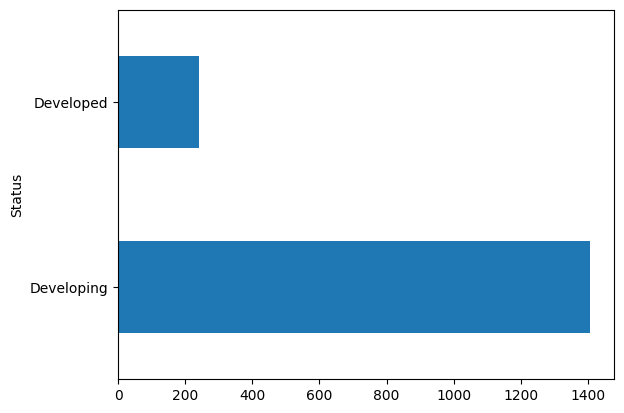

In [308]:
logdata["Status"].value_counts().plot.barh();

We need to create binary, that is, from 0 to 1. Let's do the necessary transformations.

In [309]:
logdata.Status = [1 if each == "Developing" else 0 for each in logdata.Status]   

Let's look at their general statistical properties.

In [310]:

logdata.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,1649.0,2.007841e+03,4.087711e+00,2000.00000,2005.000000,2.008000e+03,2.011000e+03,2.015000e+03
Status,1649.0,8.532444e-01,3.539695e-01,0.00000,1.000000,1.000000e+00,1.000000e+00,1.000000e+00
Life expectancy,1649.0,6.930230e+01,8.796834e+00,44.00000,64.400000,7.170000e+01,7.500000e+01,8.900000e+01
Adult Mortality,1649.0,1.682153e+02,1.253104e+02,1.00000,77.000000,1.480000e+02,2.270000e+02,7.230000e+02
infant deaths,1649.0,3.255306e+01,1.208472e+02,0.00000,1.000000,3.000000e+00,2.200000e+01,1.600000e+03
Alcohol,1649.0,4.533196e+00,4.029189e+00,0.01000,0.810000,3.790000e+00,7.340000e+00,1.787000e+01
percentage expenditure,1649.0,6.989736e+02,1.759229e+03,0.00000,37.438577,1.451023e+02,5.093900e+02,1.896135e+04
Hepatitis B,1649.0,7.921771e+01,2.560466e+01,2.00000,74.000000,8.900000e+01,9.600000e+01,9.900000e+01
Measles,1649.0,2.224494e+03,1.008580e+04,0.00000,0.000000,1.500000e+01,3.730000e+02,1.314410e+05
BMI,1649.0,3.812862e+01,1.975425e+01,2.00000,19.500000,4.370000e+01,5.580000e+01,7.710000e+01


Let's create our variables now.

In [311]:
y = logdata["Status"]
X_data = logdata.drop(["Status"], axis=1)

Let's do normalization in our data.

In [312]:
#*** Normalize ***#

X = (X_data - np.min(X_data))/(np.max(X_data) - np.min(X_data))

Let's build a model through statsmodels and make it fit. Here, the meaning of the model and how much of this variable affects us, comes from this table.

In [313]:
loj = sm.Logit(y, X)
loj_model= loj.fit()
loj_model.summary()

         Current function value: 1.852929
         Iterations: 35


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 Status   No. Observations:                 1649
Model:                          Logit   Df Residuals:                     1629
Method:                           MLE   Df Model:                           19
Date:                Mon, 27 Nov 2023   Pseudo R-squ.:                  -3.443
Time:                        10:53:36   Log-Likelihood:                -3055.5
converged:                      False   LL-Null:                       -687.70
Covariance Type:            nonrobust   LLR p-value:                     1.000
===================================================================================================
                                      coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Year                            -1.108e+05    6.6e+05     -0.168      0.867    -1.4e+06    1.18e+06
Life expectancy                 -3291.7552   2.19e+07     -0.000      1.000    -4.3e+07     4.3e+07
Adult Mortality                 -1.384e+04   8.63e+05     -0.016      0.987    -1.7e+06    1.68e+06
infant deaths                   -3126.1052   1.41e+07     -0.000      1.000   -2.76e+07    2.76e+07
Alcohol                            54.7266   3.06e+07   1.79e-06      1.000   -6.01e+07    6.01e+07
percentage expenditure           7.854e+04   7.42e+05      0.106      0.916   -1.38e+06    1.53e+06
Hepatitis B                     -3935.4087   4.47e+06     -0.001      0.999   -8.77e+06    8.77e+06
Measles                         -3.542e+05   4.67e+04     -7.590      0.000   -4.46e+05   -2.63e+05
 BMI                            -1286.6744   6.13e+06     -0.000      1.000    -1.2e+07     1.2e+07
under-five deaths               -4259.6890   9.88e+06     -0.000      1.000   -1.94e+07    1.94e+07
Polio                           -4010.4818   4.61e+06     -0.001      0.999   -9.04e+06    9.04e+06
Total expenditure                -275.0479   4.06e+07  -6.77e-06      1.000   -7.96e+07    7.96e+07
Diphtheria                      -4071.8180   5.43e+06     -0.001      0.999   -1.06e+07    1.06e+07
 HIV/AIDS                        -214.8595   1.74e+07  -1.23e-05      1.000   -3.41e+07    3.41e+07
GDP                              5.116e+05   9.69e+04      5.281      0.000    3.22e+05    7.01e+05
Population                        102.5539     12.728      8.057      0.000      77.607     127.501
 thinness  1-19 years            -440.3636   5.78e+07  -7.62e-06      1.000   -1.13e+08    1.13e+08
 thinness 5-9 years              -444.8153   5.82e+07  -7.65e-06      1.000   -1.14e+08    1.14e+08
Income composition of resources   -23.0380    7.2e+08   -3.2e-08      1.000   -1.41e+09    1.41e+09
Schooling                        -472.3459   5.82e+07  -8.11e-06      1.000   -1.14e+08    1.14e+08
===================================================================================================
"""

Then see model:

In [314]:
from sklearn.linear_model import LogisticRegression
loj = LogisticRegression(solver = "liblinear")
loj_model = loj.fit(X,y)
loj_model

LogisticRegression(solver='liblinear')

In [315]:
# constant value
loj_model.intercept_

array([1.74391137])

Coefficient values of all independent variables:

In [316]:
loj_model.coef_

array([[ 2.76198619e-06, -1.46829276e-06,  1.42149352e-05,
         5.02213905e-06, -9.75756281e-07, -3.24742353e-04,
        -1.32262780e-06,  2.82430437e-04, -2.30688998e-06,
         6.84894013e-06, -1.70186237e-06, -1.68828179e-07,
        -1.62890033e-06,  3.16789902e-07, -2.22325046e-03,
         7.48953085e-01,  5.70065035e-07,  5.75575412e-07,
        -3.31923966e-08, -5.57948790e-07]])

# PREDICT and MODEL TUNNING

In [317]:
y_pred = loj_model.predict(X)              # predict

Confusion Matrix: Those that are 1 (PP) when it is 1 in reality, 0 (PN) when it is 1, 1 (NP) when it is 0 when it is 0 (NN) when it is 0.

In [318]:
confusion_matrix(y, y_pred)

array([[   0,  242],
       [   0, 1407]], dtype=int64)

See accuracy score:

In [319]:
accuracy_score(y, y_pred)

0.853244390539721

One of the outputs that will evaluate the results of a most detailed classification algorithm.

In [320]:
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       242
           1       0.85      1.00      0.92      1407

    accuracy                           0.85      1649
   macro avg       0.43      0.50      0.46      1649
weighted avg       0.73      0.85      0.79      1649



See top 10 model predict values:

In [321]:
loj_model.predict(X)[0:10]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

* Using the 'predict_proba' module if we want to give the noble values rather than the values given above 1 and 0.


* Returns the values of 0 in the index or left side of 0, and values of 1 in the index 1 or of the right side of the matrix.

In [322]:

loj_model.predict_proba(X)[0:10][:,0:2]                # Top 10

array([[0.14636005, 0.85363995],
       [0.14879278, 0.85120722],
       [0.1465051 , 0.8534949 ],
       [0.14854593, 0.85145407],
       [0.14859853, 0.85140147],
       [0.14860552, 0.85139448],
       [0.14879595, 0.85120405],
       [0.14861678, 0.85138322],
       [0.14687571, 0.85312429],
       [0.14862704, 0.85137296]])

Now let's try to model the ten prediction probability values above 'predict_proba'.

In [323]:

y_probs = loj_model.predict_proba(X)
y_probs = y_probs[:,1]

In [324]:
y_probs[0:10]               # top 10

array([0.85363995, 0.85120722, 0.8534949 , 0.85145407, 0.85140147,
       0.85139448, 0.85120405, 0.85138322, 0.85312429, 0.85137296])

Put our guess values here in the loop and give it 1 to 0.5 and 0 to the little ones.

In [325]:

y_pred = [1 if i > 0.5 else 0 for i in y_probs]

When we look at the value above, we notice the change. Our purpose to do this is to verify our model.

In [326]:

y_pred[0:10]


[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

In [327]:

confusion_matrix(y, y_pred)


array([[   0,  242],
       [   0, 1407]], dtype=int64)

In [328]:
accuracy_score(y, y_pred)

0.853244390539721

In [329]:
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       242
           1       0.85      1.00      0.92      1407

    accuracy                           0.85      1649
   macro avg       0.43      0.50      0.46      1649
weighted avg       0.73      0.85      0.79      1649



Let's do one more look at the top 5 elements we did above.

In [330]:

loj_model.predict_proba(X)[:,1][0:5]

array([0.85363995, 0.85120722, 0.8534949 , 0.85145407, 0.85140147])

In [331]:
logit_roc_auc = roc_auc_score(y, loj_model.predict(X))

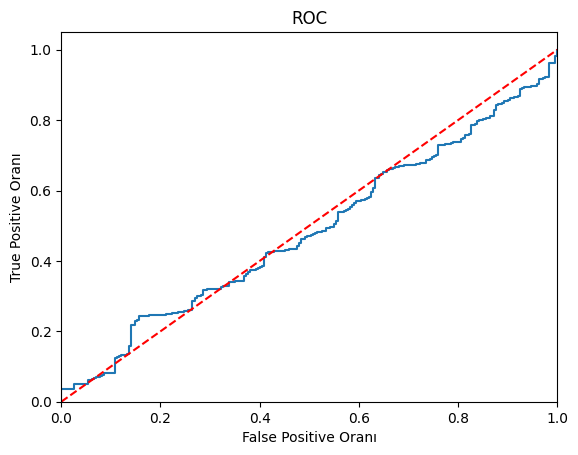

In [332]:
fpr, tpr, thresholds = roc_curve(y, loj_model.predict_proba(X)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='AUC (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Oranı')
plt.ylabel('True Positive Oranı')
plt.title('ROC')
plt.show()


Here, 

- blueline: The graphic of our success regarding the model we have established.
- redline: If we don't do anything, our model will be this way. 

In [333]:
# test train is subjected to separation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)


# Let's create and fit our model.

In [334]:

loj = LogisticRegression(solver = "liblinear")
loj_model = loj.fit(X_train,y_train)
loj_model



LogisticRegression(solver='liblinear')

Let's see accuracy score:

In [335]:
accuracy_score(y_test, loj_model.predict(X_test))


0.8424242424242424

Finally Tunned model score:

In [336]:
cross_val_score(loj_model, X_test, y_test, cv = 10).mean()


0.8424242424242424

### Result: From this data, we understand: 89% of the countries that are developing are developing countries, and the effects of the variables that will question life expectancies can be examined.

# Conclusion
We examined the **Life Expectancy (WHO)** data set with the basic models in Machine Learing and made some comments.

Note:

   - After this notebook, my aim is to prepare 'kernel' which is 'not clear' data set.

   - If you have any suggestions, please could you write for me? I wil be happy for comment and critics!

   - Thank you for your suggestion and votes ;)
